In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from datetime import date


In [2]:
df = pd.read_csv("Datasets/airline_portcountry.csv")
df.head()

,Month,Airline,Port_Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Year,Month_num,Date
0,31048,Air Caledonie,New Caledonia,725,0.368,0.0,474,0.167,0.0,1985,1,NaN
1,31048,Air China,China,1311,9.158,0.0,1232,2.587,0.0,1985,1,NaN
2,31048,Air India,India,1423,44.823,0.0,970,6.708,0.0,1985,1,NaN
3,31048,Air India,Singapore,501,10.583,0.0,306,124.966,0.0,1985,1,NaN
4,31048,Air Nauru,Nauru,161,0.212,0.0,96,23.996,0.0,1985,1,NaN


In [3]:
cols = ['Month']
df.drop(cols, axis=1, inplace=True)

In [4]:
#how many rows
df.index
#df.head()

RangeIndex(start=0, stop=42643, step=1)

In [5]:
df = df.rename(columns={'Month_num': 'Month'})

In [6]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [7]:
df

,Airline,Port_Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Year,Month,Date
0,Air Caledonie,New Caledonia,725,0.368,0.000,474,0.167,0.000,1985,1,1985-01-01
1,Air China,China,1311,9.158,0.000,1232,2.587,0.000,1985,1,1985-01-01
2,Air India,India,1423,44.823,0.000,970,6.708,0.000,1985,1,1985-01-01
3,Air India,Singapore,501,10.583,0.000,306,124.966,0.000,1985,1,1985-01-01
4,Air Nauru,Nauru,161,0.212,0.000,96,23.996,0.000,1985,1,1985-01-01
5,Air New Zealand,New Zealand,24588,873.066,0.374,20692,348.740,0.122,1985,1,1985-01-01
6,Air Niugini,Papua New Guinea,2954,20.035,0.000,2906,69.047,0.000,1985,1,1985-01-01
7,Air Pacific,Fiji,3350,26.257,0.000,2470,100.639,0.000,1985,1,1985-01-01
8,Air Pacific,Solomon Islands,574,3.227,0.000,578,12.322,0.000,1985,1,1985-01-01
9,Air Pacific,Vanuatu,280,0.356,0.000,205,2.735,0.000,1985,1,1985-01-01


In [8]:
df = df.set_index('Date')
df.index

DatetimeIndex(['1985-01-01', '1985-01-01', '1985-01-01', '1985-01-01',
               '1985-01-01', '1985-01-01', '1985-01-01', '1985-01-01',
               '1985-01-01', '1985-01-01',
               ...
               '2020-08-01', '2020-08-01', '2020-08-01', '2020-08-01',
               '2020-08-01', '2020-08-01', '2020-08-01', '2020-08-01',
               '2020-08-01', '2020-08-01'],
              dtype='datetime64[ns]', name='Date', length=42643, freq=None)

In [9]:
total_pass = df['Passengers_In'] + df['Passengers_Out'] + 1
total_freight = df['Freight_In_(tonnes)'] + df['Freight_Out_(tonnes)'] + 1
total_mail = df['Mail_In_(tonnes)'] + df['Mail_Out_(tonnes)'] + 1

In [10]:
y1 = np.log(total_pass.resample('MS').mean())
y2 = np.log(total_freight.resample('MS').mean())
y3 = np.log(total_mail.resample('MS').mean())

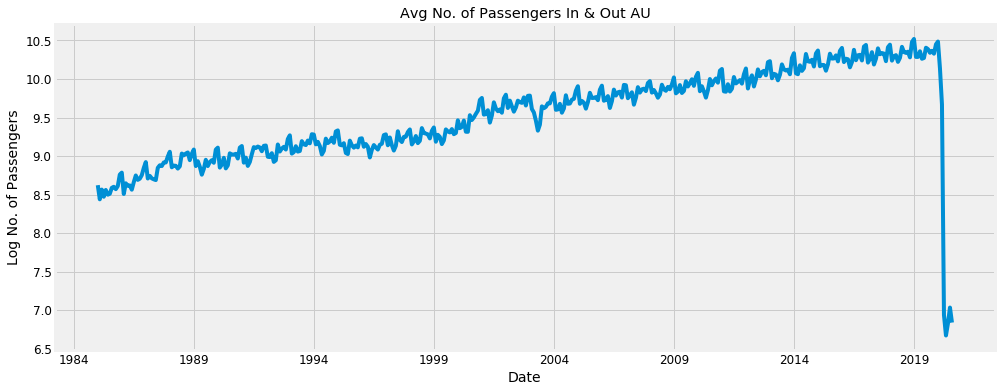

In [11]:
p = y1.plot(figsize=(15, 6))
plt.title("Avg No. of Passengers In & Out AU")
p.set_xlabel('Date')
p.set_ylabel('Log No. of Passengers')
plt.show()

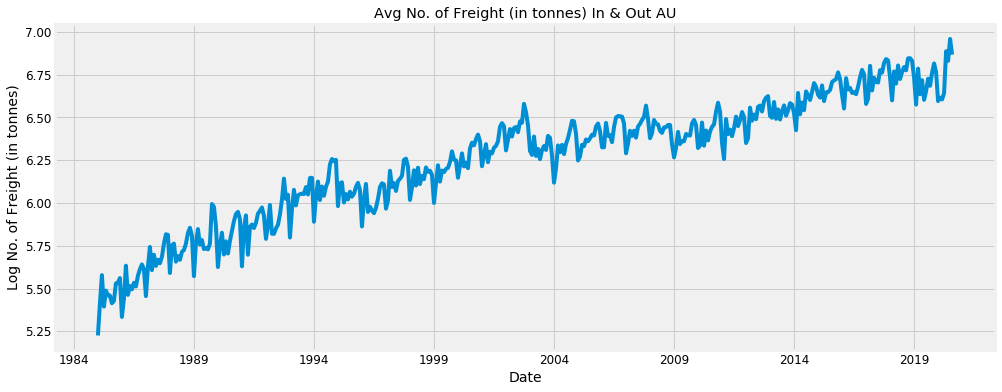

In [12]:
p2 = y2.plot(figsize=(15, 6))
plt.title("Avg No. of Freight (in tonnes) In & Out AU")
p2.set_xlabel('Date')
p2.set_ylabel('Log No. of Freight (in tonnes)')
plt.show()

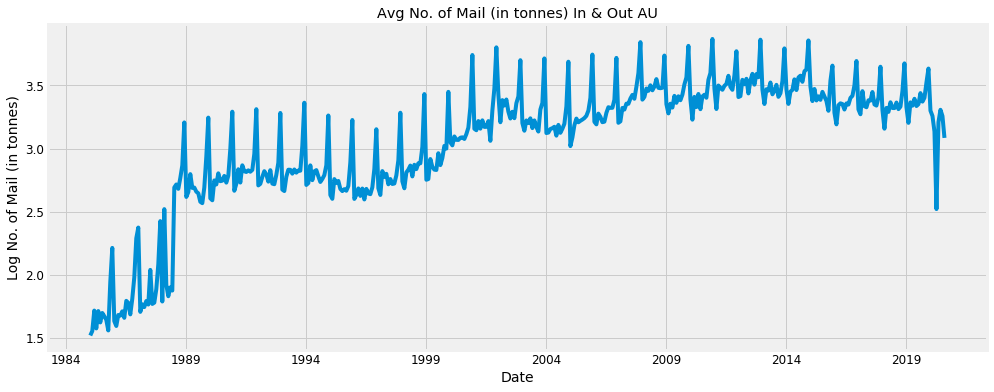

In [13]:
p3 = y3.plot(figsize=(15, 6))
plt.title("Avg No. of Mail (in tonnes) In & Out AU")
p3.set_xlabel('Date')
p3.set_ylabel('Log No. of Mail (in tonnes)')
plt.show()

# Passengers

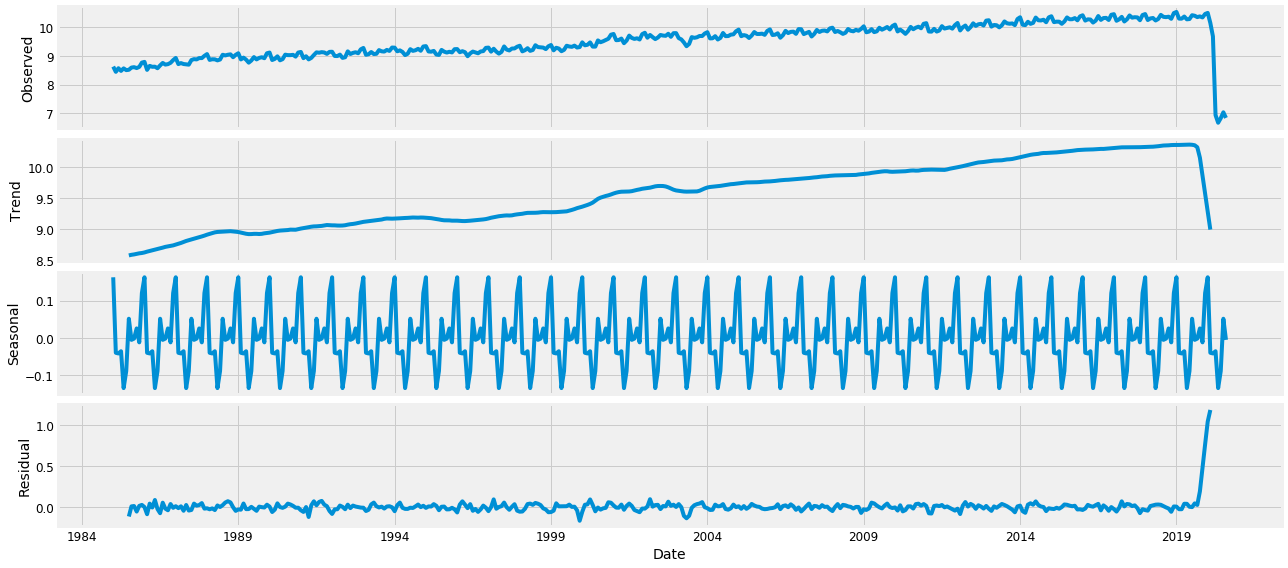

In [14]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y1, model='additive')
fig = decomposition.plot()
plt.show()

### Time series forecasting with ARIMA

In [15]:
#ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
#to use a “grid search” to find the optimal set of parameters that yields the best performance for our model

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3140.5773623785685
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2534.007711269361
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:404.231877714267
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:405.2624287665123
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:406.33994693933954
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:408.1205413626444
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:405.30718734793123
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:407.0336653715883
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2557.146095841361


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2539.746405061965
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:42.80814659872772
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:52.52346625641786


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:419.42011838573444
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:46.385303572860494
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:51.9688022824179
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:54.4607245684073
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-307.08154350432704
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-343.5064379938523


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-388.41538029629237
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-388.8387742995836
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-394.5300435325306


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-406.02960350173555
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-386.8752198479678
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-387.40194800940657
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-308.51188536891
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-348.2407993512335
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-395.74681857871906
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-400.5315982604079
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-405.44563348087115
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-417.5614453423224
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-399.8341673880785
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-399.7825024519615
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-305.97884078430917


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-296.3086895825297
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-390.0256830123783
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-390.4658400290738
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-388.28403726598697
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-409.6496249279762
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-387.35169588713586
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-389.26738460719366
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-307.9591571387416
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-300.3705054053141
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-395.68856382336594
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-399.935888895045
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-404.4599916991597
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-418.14357405530825
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-397.8466795099381
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-399.1233252985795
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-308.4740227527542
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-348.92784072210054
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-396.7

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-415.4951784558924
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-395.8673765963445
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-397.83665944246854


### Fitting the ARIMA model

In [17]:
mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0021      0.639      0.003      0.997      -1.251       1.255
ma.L1          0.1929      0.660      0.292      0.770      -1.101       1.487
ar.S.L12      -0.6153      0.283     -2.175      0.030      -1.170      -0.061
sigma2         0.0214      0.000     54.230      0.000       0.021       0.022


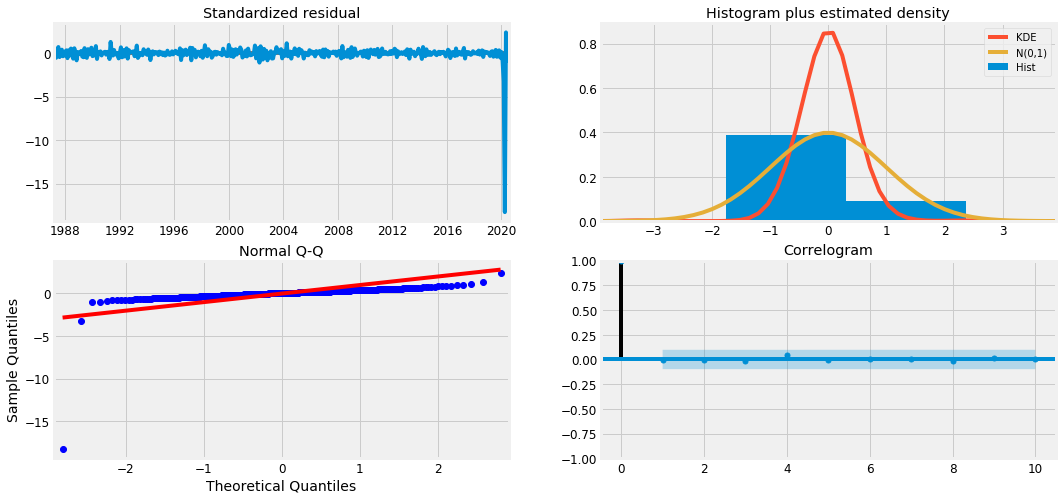

In [18]:
#to investigate any unusual behavior
results.plot_diagnostics(figsize=(16, 8))
plt.show()

### Validating forecasts

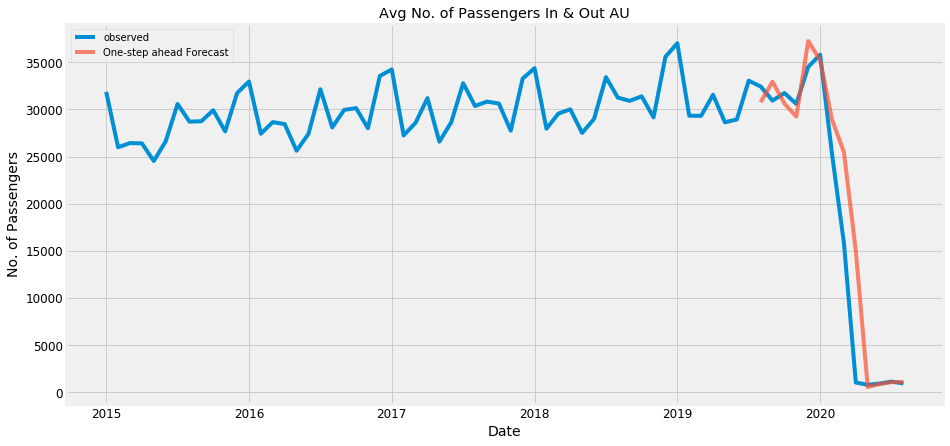

In [19]:
pred1 = results.get_prediction(start=pd.to_datetime('2019-08-01'), dynamic=False)
y1 = np.exp(y1) - 1
ax = y1['2015':].plot(label='observed')
pred1.predicted_mean = np.exp(pred1.predicted_mean)
pred1.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.set_xlabel('Date')
ax.set_ylabel('No. of Passengers')
plt.title("Avg No. of Passengers In & Out AU")
plt.legend()
plt.show()

In [20]:
y1_forecasted = pred1.predicted_mean
y1_truth = y1['2017-01-01':]
mse = ((y1_forecasted - y1_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 24513531.98
The Root Mean Squared Error of our forecasts is 4951.11


### Producing and visualizing forecasts

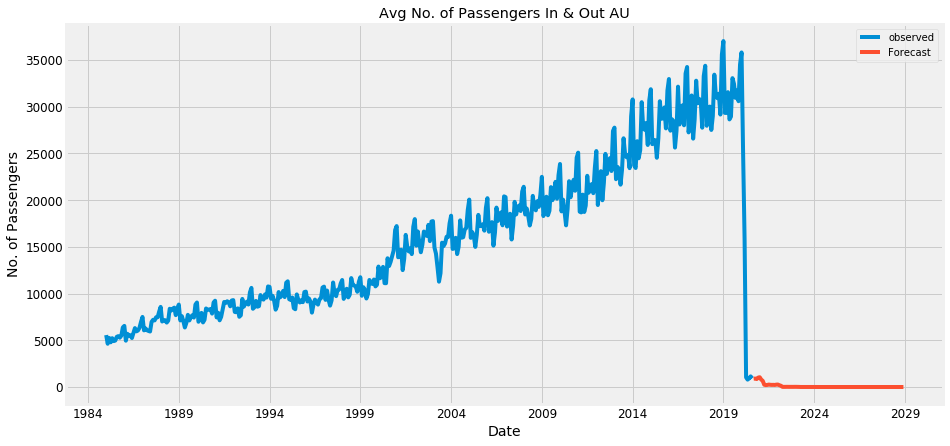

In [21]:
pred_uc = results.get_forecast(steps=100)
ax = y1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean = np.exp(pred_uc.predicted_mean)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('No. of Passengers')
plt.title("Avg No. of Passengers In & Out AU")
plt.legend()
plt.show()

# Freight

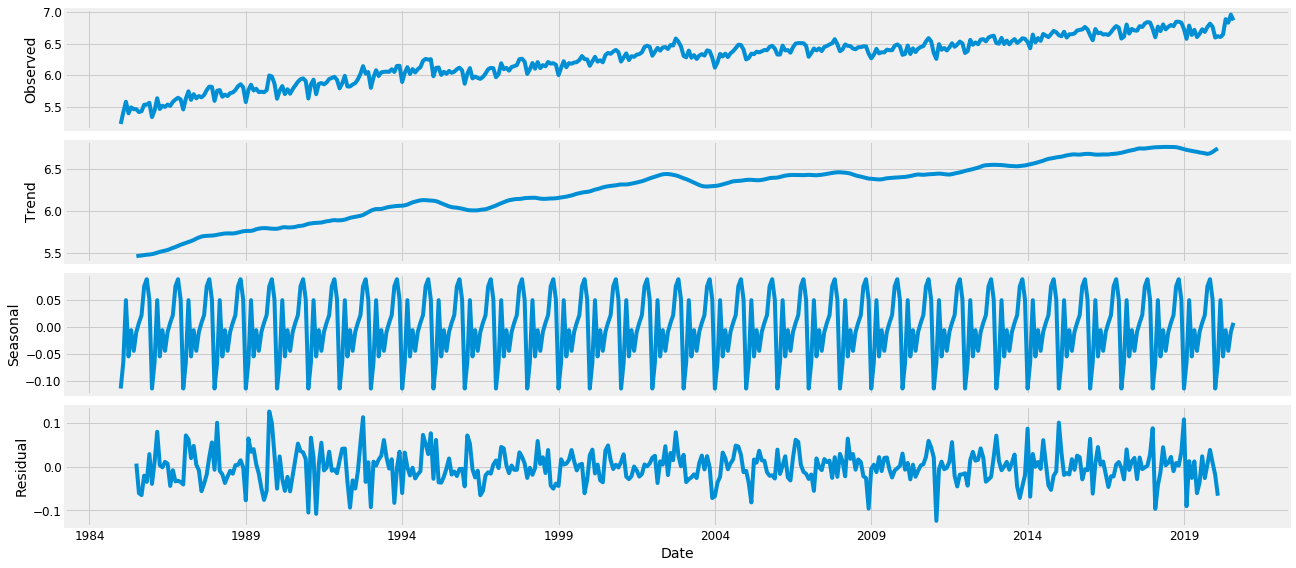

In [22]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y2, model='additive')
fig = decomposition.plot()
plt.show()

In [23]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [24]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results2 = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-395.8673765963445
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-395.8673765963445


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-395.8673765963445
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-395.8673765963445
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-395.8673765963445
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-395.8673765963445
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-395.8673765963445
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-395.8673765963445
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-395.8673765963445
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-395.8673765963445
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-395.8673765963445
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-395.8673765963445
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-395.8673765963445
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-395.8673765963445
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-395.8673765963445
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-395.8673765963445
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-395.8673765963445
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-395.8673765963445
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-395.8673765963445
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-395.867376

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-395.8673765963445
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-395.8673765963445
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-395.8673765963445
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-395.8673765963445
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-395.8673765963445
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-395.8673765963445
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-395.8673765963445
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-395.8673765963445
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-395.8673765963445
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-395.8673765963445
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-395.8673765963445
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-395.8673765963445
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-395.8673765963445
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-395.8673765963445
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-395.8673765963445
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-395.8673765963445
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-395.8673765963445
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-395.867376

In [25]:
mod = sm.tsa.statespace.SARIMAX(y2,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results2 = mod.fit()
print(results2.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1948      0.104      1.880      0.060      -0.008       0.398
ma.L1         -0.5598      0.091     -6.167      0.000      -0.738      -0.382
ar.S.L12      -0.5400      0.041    -13.073      0.000      -0.621      -0.459
sigma2         0.0022      0.000     17.462      0.000       0.002       0.002


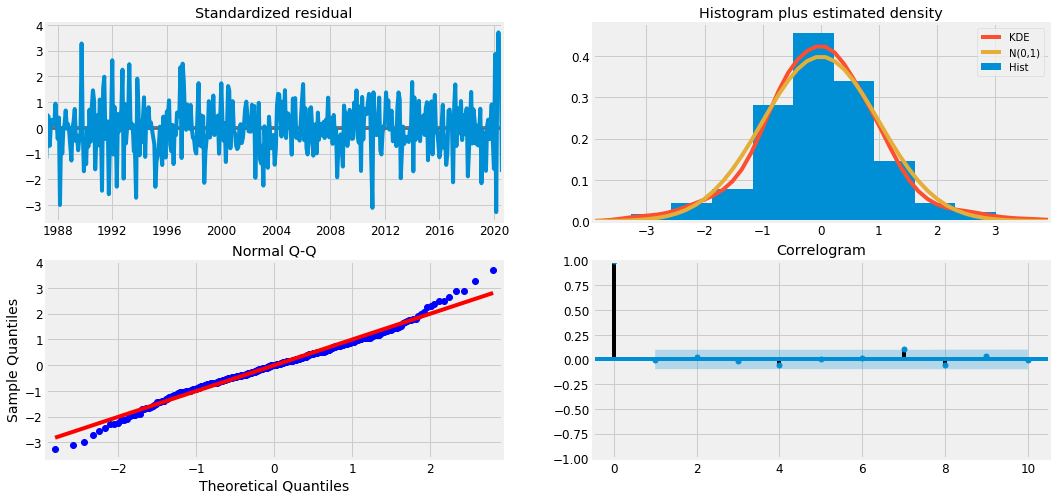

In [26]:
results2.plot_diagnostics(figsize=(16, 8))
plt.show()

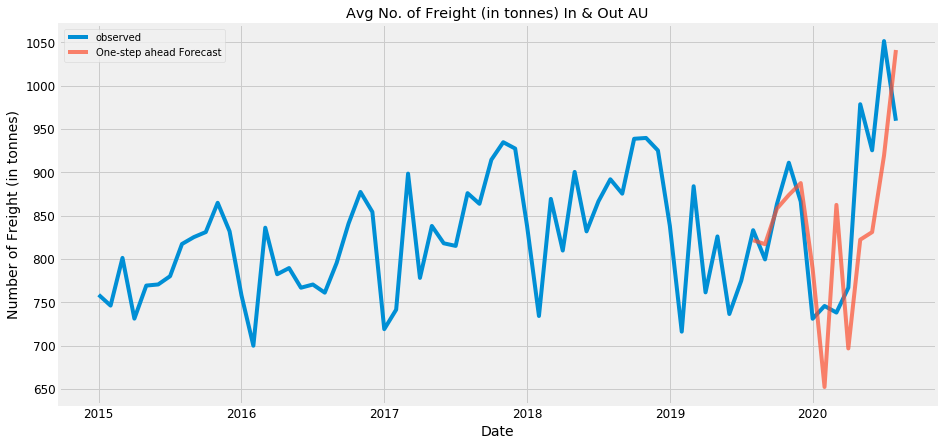

In [27]:
pred2 = results2.get_prediction(start=pd.to_datetime('2019-08-01'), dynamic=False)
y2 = np.exp(y2) - 1
ax = y2['2015':].plot(label='observed')
pred2.predicted_mean = np.exp(pred2.predicted_mean)
pred2.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Number of Freight (in tonnes)')
plt.title("Avg No. of Freight (in tonnes) In & Out AU")
plt.legend()
plt.show()

In [28]:
y2_forecasted = pred2.predicted_mean
y2_truth = y2['2017-01-01':]
mse = ((y2_forecasted - y2_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 7089.88
The Root Mean Squared Error of our forecasts is 84.2


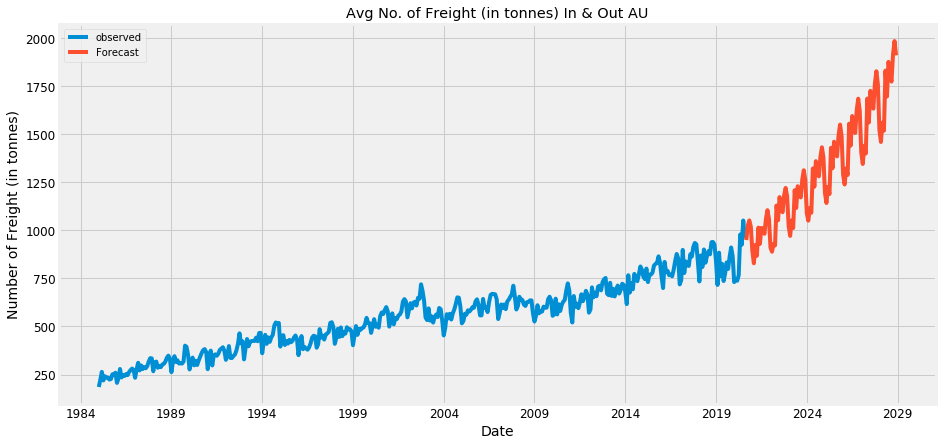

In [29]:
pred_uc2 = results2.get_forecast(steps=100)
pred_uc2.predicted_mean = np.exp(pred_uc2.predicted_mean)
ax = y2.plot(label='observed', figsize=(14, 7))
pred_uc2.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Freight (in tonnes)')
plt.title("Avg No. of Freight (in tonnes) In & Out AU")
plt.legend()
plt.show()

# Mail

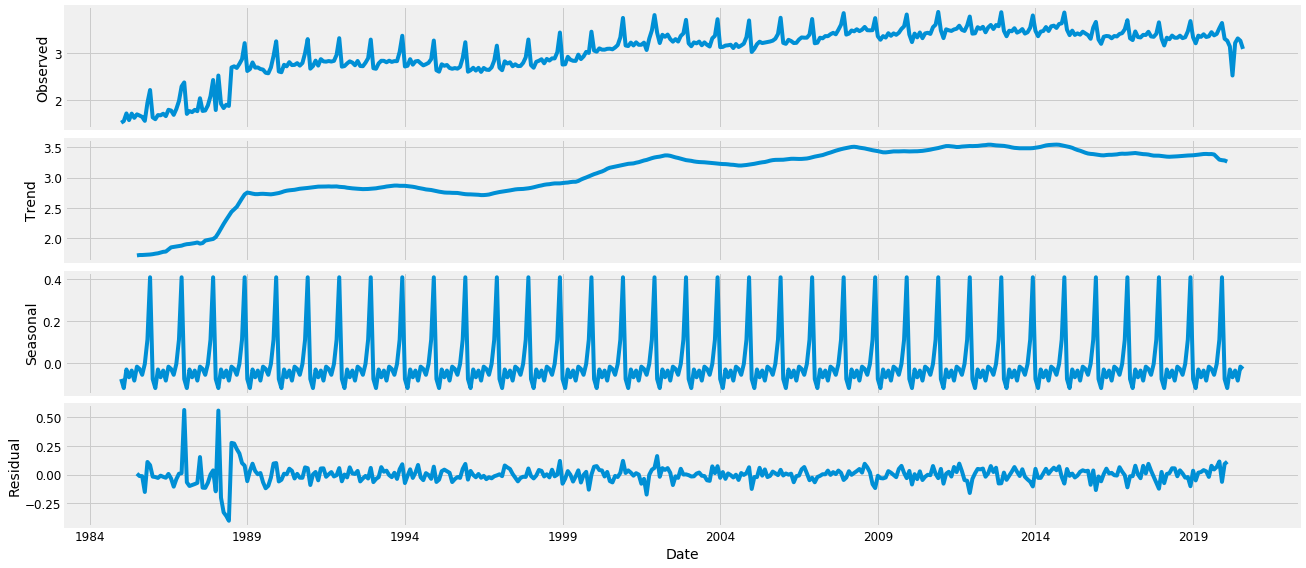

In [30]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y3, model='additive')
fig = decomposition.plot()
plt.show()

In [32]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y3,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results3 = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-712.3317044474392
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-712.3317044474392
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-712.3317044474392
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-712.3317044474392
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-712.3317044474392
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-712.3317044474392
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-712.3317044474392
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-712.3317044474392
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-712.3317044474392
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-712.3317044474392
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-712.3317044474392
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-712.3317044474392
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-712.3317044474392
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-712.3317044474392
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-712.3317044474392
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-712.3317044474392
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-712.3317044474392
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-712.331704

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-712.3317044474392
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-712.3317044474392
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-712.3317044474392
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-712.3317044474392
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-712.3317044474392
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-712.3317044474392
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-712.3317044474392
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-712.3317044474392
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-712.3317044474392
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-712.3317044474392


In [33]:
mod = sm.tsa.statespace.SARIMAX(y3,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results3 = mod.fit()
print(results3.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2282      0.060      3.833      0.000       0.112       0.345
ma.L1         -0.6732      0.057    -11.874      0.000      -0.784      -0.562
ar.S.L12      -0.5203      0.017    -30.226      0.000      -0.554      -0.487
sigma2         0.0118      0.000     43.226      0.000       0.011       0.012


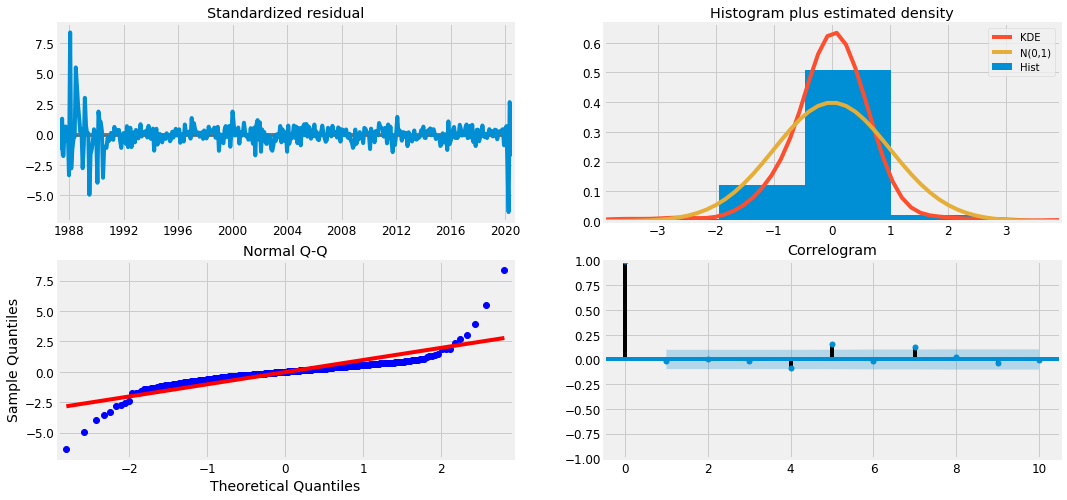

In [34]:
results3.plot_diagnostics(figsize=(16, 8))
plt.show()

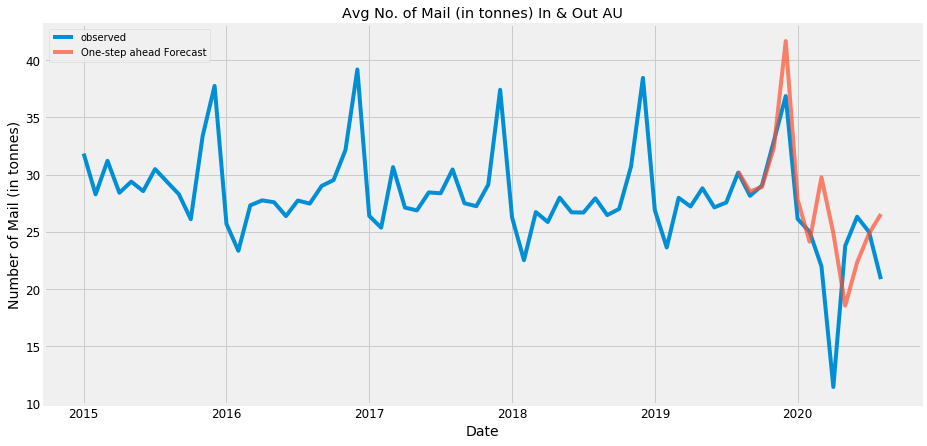

In [35]:
pred3 = results3.get_prediction(start=pd.to_datetime('2019-08-01'), dynamic=False)
y3 = np.exp(y3) - 1
ax = y3['2015':].plot(label='observed')
pred3.predicted_mean = np.exp(pred3.predicted_mean)
pred3.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Number of Mail (in tonnes)')
plt.title("Avg No. of Mail (in tonnes) In & Out AU")
plt.legend()
plt.show()

In [36]:
y3_forecasted = pred3.predicted_mean
y3_truth = y3['2017-01-01':]
mse = ((y3_forecasted - y3_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 26.44
The Root Mean Squared Error of our forecasts is 5.14


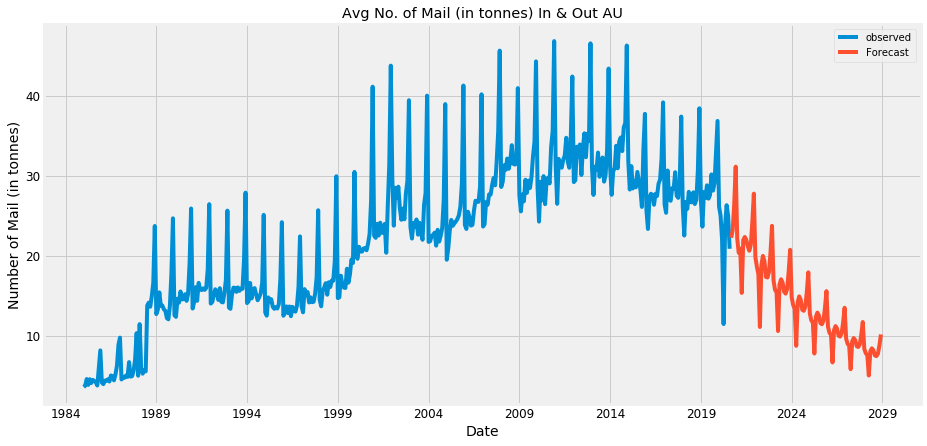

In [37]:
pred_uc3 = results3.get_forecast(steps=100)
ax = y3.plot(label='observed', figsize=(14, 7))
pred_uc3.predicted_mean = np.exp(pred_uc3.predicted_mean)
pred_uc3.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Mail (in tonnes)')
plt.title("Avg No. of Mail (in tonnes) In & Out AU")
plt.legend()
plt.show()